In [37]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder

In [38]:
df = pd.read_csv('csv/StudentPerformanceFactors.csv')

In [39]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [40]:
# Apply Label Encoding for Ordered Categories
ordinal_columns = ["Parental_Involvement", "Teacher_Quality", "Parental_Education_Level", "Distance_from_Home", "Family_Income"]
encoder = LabelEncoder()

for col in ordinal_columns:
    df[col] = encoder.fit_transform(df[col])

In [41]:
# Apply One-Hot Encoding for Unordered Categorical Features
df = pd.get_dummies(df, columns=["Access_to_Resources" , "Learning_Disabilities" , "Extracurricular_Activities" , "Motivation_Level",
                                  "Internet_Access" , "School_Type" , "Peer_Influence" , "Gender"], drop_first=True)

In [42]:

# Define Features (X) and Target (Y)
X = df.drop(columns=["Exam_Score"])  # All columns except target
Y = df["Exam_Score"]  # Target variable

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, Y_train)

LinearRegression()

In [49]:
print(f"Intercept (b): {model.intercept_:.2f}")  # The base score when all features are 0
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Intercept (b): 40.87
                                Coefficient
Hours_Studied                      0.290488
Attendance                         0.198493
Parental_Involvement              -0.449715
Sleep_Hours                       -0.021788
Previous_Scores                    0.047041
Tutoring_Sessions                  0.505798
Family_Income                     -0.173434
Teacher_Quality                   -0.235980
Physical_Activity                  0.170844
Parental_Education_Level           0.156563
Distance_from_Home                 0.439871
Access_to_Resources_Low           -2.010477
Access_to_Resources_Medium        -0.981163
Learning_Disabilities_Yes         -0.871775
Extracurricular_Activities_Yes     0.585901
Motivation_Level_Low              -1.043396
Motivation_Level_Medium           -0.570138
Internet_Access_Yes                0.987837
School_Type_Public                -0.018354
Peer_Influence_Neutral             0.586499
Peer_Influence_Positive            1.086912
Gender_Male

In [51]:
Y_pred = model.predict(X_test)


In [52]:
# Compute errors
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 3.94
R² Score: 0.72


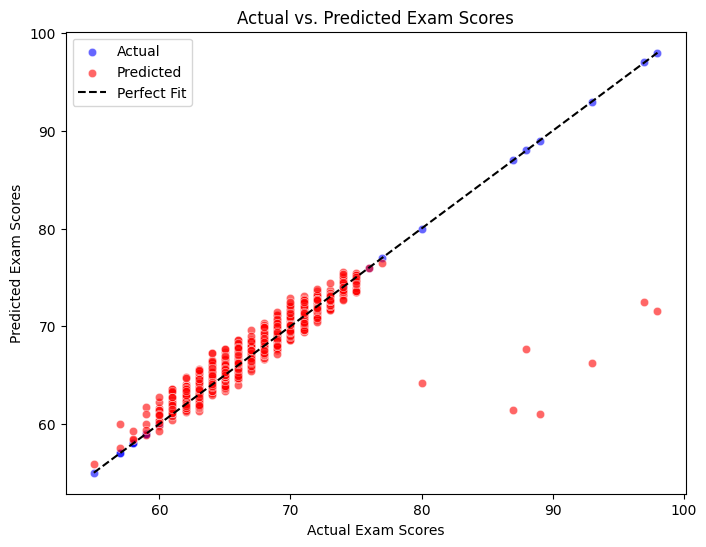

In [57]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual", alpha=0.6)  # Actual values
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted", alpha=0.6)  # Predicted values

# Plot a reference diagonal line (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="black", linestyle="--", label="Perfect Fit")

# Labels, title, and legend
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs. Predicted Exam Scores")
plt.legend()
plt.show()

In [58]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)


                                Coefficient
Peer_Influence_Positive            1.086912
Internet_Access_Yes                0.987837
Peer_Influence_Neutral             0.586499
Extracurricular_Activities_Yes     0.585901
Tutoring_Sessions                  0.505798
Distance_from_Home                 0.439871
Hours_Studied                      0.290488
Attendance                         0.198493
Physical_Activity                  0.170844
Parental_Education_Level           0.156563
Previous_Scores                    0.047041
School_Type_Public                -0.018354
Sleep_Hours                       -0.021788
Gender_Male                       -0.031614
Family_Income                     -0.173434
Teacher_Quality                   -0.235980
Parental_Involvement              -0.449715
Motivation_Level_Medium           -0.570138
Learning_Disabilities_Yes         -0.871775
Access_to_Resources_Medium        -0.981163
Motivation_Level_Low              -1.043396
Access_to_Resources_Low         

In [59]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, Y_pred)

print(f"R² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Test Data: {r2_test:.4f}")


R² Score on Training Data: 0.6734
R² Score on Test Data: 0.7210
